##  Using Crossref API for citation metrics and publication details.

### Previously (Notebook 'C1'), we used Digital Object Identifiers (DOIs) to find citation metrics references reported by the BRC team in phase 2

### Now we want to add citation counts from CrossRef to compare


In [75]:
import pandas as pd
from habanero import Crossref, cn, counts, exceptions
import time


In [76]:
%matplotlib inline

In [77]:
df_in = pd.read_csv('./C1out_2367_with_Dimesions_Counts(08Aug19).csv')
df_in.columns


Index(['FinalDOI', 'ID', 'complete', 'api_add', 'field_citation_ratio',
       'highly_cited_1', 'highly_cited_10', 'highly_cited_5', 'license',
       'recent_citations', 'relative_citation_ratio', 'times_cited'],
      dtype='object')

In [78]:
df_in[df_in.duplicated(subset='ID', keep=False)]

,FinalDOI,ID,complete,api_add,field_citation_ratio,highly_cited_1,highly_cited_10,highly_cited_5,license,recent_citations,relative_citation_ratio,times_cited


In [79]:
df_in.columns=(['FinalDOI', 'ID', 'complete','api_add', 'field_citation_ratio',
       'highly_cited_1', 'highly_cited_10', 'highly_cited_5', 'license',
       'recent_citations', 'relative_citation_ratio', 'Dim_times_cited'])


In [80]:
cr = Crossref()

In [81]:
#Crossref(api_key = "168421")
# set a mailto address
Crossref(mailto = "laurence.brown@it.ox.ac.uk")

< Crossref 
URL: https://api.crossref.org
KEY: None
MAILTO: laurence.brown@it.ox.ac.uk
>

In [82]:
df_mini = df_in.iloc[560:570]

In [83]:
df_mini.head(2)

,FinalDOI,ID,complete,api_add,field_citation_ratio,highly_cited_1,highly_cited_10,highly_cited_5,license,recent_citations,relative_citation_ratio,Dim_times_cited
560,10.1002/mrm.26905,2376,"eippert f, kong y, winkler am, andersson jl, f...","{'doi': '10.1002/mrm.26905', 'times_cited': 5,...",NaN,False,False,False,This data has been sourced via the Dimensions ...,5.0,NaN,5.0
561,10.1111/imm.12226,938,"elias sc, choudhary p, de cassan sc, biswas s,...","{'doi': '10.1111/imm.12226', 'times_cited': 25...",4.35,False,False,False,This data has been sourced via the Dimensions ...,10.0,1.7,25.0


### And the works module (as used to get the most likely DOI from the title in earlier notebooks), can also be used to obtain specific details of the reference from the DOI, such as year and month of publication, as well as  citation count.    (... and potentially authors, try later) 

In [84]:
# an example of the full record found by DOI

cr.works(ids=df_in.FinalDOI[0])

{'message': {'DOI': '10.1186/s12881-014-0095-4',
  'ISSN': ['1471-2350'],
  'URL': 'http://dx.doi.org/10.1186/s12881-014-0095-4',
  'alternative-id': ['95'],
  'article-number': '95',
  'author': [{'affiliation': [],
    'family': 'Fenwick',
    'given': 'Aimee L',
    'sequence': 'first'},
   {'affiliation': [],
    'family': 'Goos',
    'given': 'Jacqueline AC',
    'sequence': 'additional'},
   {'affiliation': [],
    'family': 'Rankin',
    'given': 'Julia',
    'sequence': 'additional'},
   {'affiliation': [],
    'family': 'Lord',
    'given': 'Helen',
    'sequence': 'additional'},
   {'affiliation': [],
    'family': 'Lester',
    'given': 'Tracy',
    'sequence': 'additional'},
   {'affiliation': [],
    'family': 'Hoogeboom',
    'given': 'A Jeannette M',
    'sequence': 'additional'},
   {'affiliation': [],
    'family': 'van den Ouweland',
    'given': 'Ans MW',
    'sequence': 'additional'},
   {'affiliation': [],
    'family': 'Wall',
    'given': 'Steven A',
    'sequenc

In [85]:
cr.works(ids=df_in.FinalDOI[0])['message']['is-referenced-by-count']

3

In [86]:
pd.Timestamp(cr.works(ids=df_in.FinalDOI[0])['message']['created']['date-time'])  # also try ['message']['issued']

Timestamp('2014-08-30 14:03:56+0000', tz='UTC')

In [87]:
cr.works(ids=df_in.FinalDOI[0])['message']['author']

[{'affiliation': [],
  'family': 'Fenwick',
  'given': 'Aimee L',
  'sequence': 'first'},
 {'affiliation': [],
  'family': 'Goos',
  'given': 'Jacqueline AC',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'Rankin',
  'given': 'Julia',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'Lord',
  'given': 'Helen',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'Lester',
  'given': 'Tracy',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'Hoogeboom',
  'given': 'A Jeannette M',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'van den Ouweland',
  'given': 'Ans MW',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'Wall',
  'given': 'Steven A',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'Mathijssen',
  'given': 'Irene MJ',
  'sequence': 'additional'},
 {'affiliation': [],
  'family': 'Wilkie',
  'given': 'Andrew OM',
  'sequence': 'additional'}]

In [88]:
def CrossRefTimeCitesAuthors(df):
    try:
        search = cr.works(ids=df.FinalDOI)
        time.sleep(0.1)
        try:
            pub_time = pd.Timestamp(search ['message']['created']['date-time'])
        except:
            pub_time = pd.np.nan
        try:
            citations = search ['message']['is-referenced-by-count']
        except:
            citations = pd.np.nan
        try:
            authors = search ['message']['author'] 
        except:
            authors = pd.np.nan
        return pub_time, citations, authors
    except:
        return pd.np.nan, pd.np.nan, pd.np.nan
        time.sleep(0.1)
        pass






In [89]:
df_mini[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_mini.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

df_mini

C:\Users\loz_r\Anaconda3\envs\biblio_tools\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,FinalDOI,ID,complete,api_add,field_citation_ratio,highly_cited_1,highly_cited_10,highly_cited_5,license,recent_citations,relative_citation_ratio,Dim_times_cited,pub_date_CR_API,CR_times_cited,authors_CR
560,10.1002/mrm.26905,2376,"eippert f, kong y, winkler am, andersson jl, f...","{'doi': '10.1002/mrm.26905', 'times_cited': 5,...",NaN,False,False,False,This data has been sourced via the Dimensions ...,5.0,NaN,5.0,2017-09-14 06:58:14+00:00,5,"[{'given': 'Tung-Lin', 'family': 'Wu', 'sequen..."
561,10.1111/imm.12226,938,"elias sc, choudhary p, de cassan sc, biswas s,...","{'doi': '10.1111/imm.12226', 'times_cited': 25...",4.35,False,False,False,This data has been sourced via the Dimensions ...,10.0,1.70,25.0,2013-12-05 10:23:11+00:00,25,"[{'given': 'Sean C.', 'family': 'Elias', 'sequ..."
562,10.4049/jimmunol.1201455,323,"elias sc, collins ka, halstead fd, choudhary p...","{'doi': '10.4049/jimmunol.1201455', 'times_cit...",1.86,False,False,False,This data has been sourced via the Dimensions ...,6.0,0.59,13.0,2013-01-05 07:24:25+00:00,13,"[{'given': 'Sean C.', 'family': 'Elias', 'sequ..."
563,10.1016/j.jcmg.2012.02.016,136,"elkhawad m, rudd jhf, sarov-blat l, cai g, wil...","{'doi': '10.1016/j.jcmg.2012.02.016', 'times_c...",22.11,False,False,False,This data has been sourced via the Dimensions ...,29.0,3.19,85.0,2012-09-10 22:00:32+00:00,71,"[{'given': 'Maysoon', 'family': 'Elkhawad', 's..."
564,10.1097/inf.0000000000001011,1702,"ellul ma, griffiths mj, iyer a, avula s, defre...","{'doi': '10.1097/inf.0000000000001011', 'times...",1.79,False,False,False,This data has been sourced via the Dimensions ...,5.0,1.08,6.0,2015-12-09 19:18:39+00:00,5,"[{'given': 'Mark A.', 'family': 'Ellul', 'sequ..."
565,10.1111/jicd.12088,445,"elshibly a, coulter w, millar b, prendergast b...","{'doi': '10.1111/jicd.12088', 'times_cited': 6...",1.53,False,False,False,This data has been sourced via the Dimensions ...,5.0,0.38,6.0,2014-03-07 11:50:21+00:00,3,"[{'given': 'Ahmed', 'family': 'Elshibly', 'seq..."
566,10.1001/jamainternmed.2014.6924,1339,"emdin c, odutayo a, hsiao a, shakir m, hopewel...","{'doi': '10.1001/jamainternmed.2014.6924', 'ti...",NaN,False,False,False,This data has been sourced via the Dimensions ...,10.0,0.95,17.0,2014-12-29 23:31:12+00:00,14,"[{'given': 'Connor', 'family': 'Emdin', 'seque..."
567,10.1136/bmj.h4865,1610,"emdin ca, anderson sg, callender t, conrad n, ...","{'doi': '10.1136/bmj.h4865', 'times_cited': 39...",13.22,False,False,False,This data has been sourced via the Dimensions ...,32.0,2.05,39.0,2015-09-30 18:16:00+00:00,33,"[{'given': 'Connor A', 'family': 'Emdin', 'seq..."
568,10.1093/ije/dyw053,2065,"emdin ca, anderson sg, salimi-khorshidi g, woo...","{'doi': '10.1093/ije/dyw053', 'times_cited': 2...",10.06,False,False,False,This data has been sourced via the Dimensions ...,20.0,3.54,21.0,2016-05-04 01:31:33+00:00,5,"[{'given': 'Connor A.', 'family': 'Emdin', 'se..."
569,10.1016/j.jacc.2015.07.059,702,"emdin ca, anderson sg, woodward m, rahimi k. u...","{'doi': '10.1016/j.jacc.2015.07.059', 'times_c...",15.92,False,False,False,This data has been sourced via the Dimensions ...,38.0,3.92,51.0,2015-09-28 23:31:17+00:00,49,"[{'given': 'Connor A.', 'family': 'Emdin', 'se..."


In [90]:
df_in[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_in.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

In [91]:
df_in.to_csv('./C2out_2367_DOIsWith_2counts_and_year(08Aug19).csv')

In [92]:
df_in.count()

FinalDOI                   2367
ID                         2367
complete                   2367
api_add                    2365
field_citation_ratio       2239
highly_cited_1             2359
highly_cited_10            2359
highly_cited_5             2359
license                    2359
recent_citations           2359
relative_citation_ratio    2284
Dim_times_cited            2359
pub_date_CR_API            2362
CR_times_cited             2362
authors_CR                 2349
dtype: int64

In [98]:
df_in['year'] = df_in.pub_date_CR_API.dt.year
df_in['month'] = df_in.pub_date_CR_API.dt.month

In [99]:
df_in

,FinalDOI,ID,complete,api_add,field_citation_ratio,highly_cited_1,highly_cited_10,highly_cited_5,license,recent_citations,relative_citation_ratio,Dim_times_cited,pub_date_CR_API,CR_times_cited,authors_CR,year,month
0,10.1186/s12881-014-0095-4,1125,"&amp; , fenwick al, goos jac, rankin j, lord h...","{'doi': '10.1186/s12881-014-0095-4', 'times_ci...",0.39,False,False,False,This data has been sourced via the Dimensions ...,3.0,0.17,3.0,2014-08-30 14:03:56+00:00,3.0,"[{'given': 'Aimee L', 'family': 'Fenwick', 'se...",2014.0,8.0
1,10.1183/13993003.00321-2016,1996,", pattinson kt, turner mr. a wider pathologica...","{'doi': '10.1183/13993003.00321-2016', 'times_...",0.70,False,False,False,This data has been sourced via the Dimensions ...,1.0,0.28,2.0,2016-06-01 01:53:39+00:00,1.0,"[{'given': 'Kyle T.S.', 'family': 'Pattinson',...",2016.0,6.0
2,10.1161/strokeaha.113.679936,506,"adib-samii p, rost n, traylor m, devan w, ...","{'doi': '10.1161/strokeaha.113.679936', 'times...",8.43,False,False,False,This data has been sourced via the Dimensions ...,9.0,1.53,33.0,2013-05-15 04:36:29+00:00,30.0,"[{'given': 'Poneh', 'family': 'Adib-Samii', 's...",2013.0,5.0
3,10.1093/annonc/mdu449,1430,"and i. tomlinson*, findlay jm, middleton mr, t...","{'doi': '10.1093/annonc/mdu449', 'times_cited'...",9.15,False,False,False,This data has been sourced via the Dimensions ...,25.0,2.62,36.0,2014-09-12 00:32:37+00:00,26.0,"[{'given': 'J. M.', 'family': 'Findlay', 'sequ...",2014.0,9.0
4,10.1161/strokeaha.113.002707,848,"dichgans m, malik r, kã•_nig ir, rosand j, ...","{'doi': '10.1161/strokeaha.113.002707', 'times...",51.43,False,False,False,This data has been sourced via the Dimensions ...,99.0,8.56,183.0,2013-11-22 05:07:47+00:00,169.0,"[{'given': 'Martin', 'family': 'Dichgans', 'se...",2013.0,11.0
5,10.3174/ajnr.a4208,1312,"g w, rane , harston g w, rane n, shaya g, t...","{'doi': '10.3174/ajnr.a4208', 'times_cited': 1...",4.46,False,False,False,This data has been sourced via the Dimensions ...,9.0,0.69,11.0,2015-01-30 04:31:51+00:00,10.0,"[{'given': 'G.W.J.', 'family': 'Harston', 'seq...",2015.0,1.0
6,10.1111/bjd.13199,1168,"greenwald l, gutowska-owsiak d, watson c, se...","{'doi': '10.1111/bjd.13199', 'times_cited': 17...",2.83,False,False,False,This data has been sourced via the Dimensions ...,11.0,1.11,17.0,2014-06-24 14:00:16+00:00,15.0,"[{'given': 'D.', 'family': 'Gutowska-Owsiak', ...",2014.0,6.0
7,10.1016/j.atherosclerosis.2012.03.036,62,"kylintireas i, craig s, nethononda r, kohle...",{'doi': '10.1016/j.atherosclerosis.2012.03.036...,4.50,False,False,False,This data has been sourced via the Dimensions ...,8.0,0.81,19.0,2012-04-19 13:58:06+00:00,16.0,"[{'given': 'Ilias', 'family': 'Kylintireas', '...",2012.0,4.0
8,10.1007/s10608-016-9795-8,2137,"m.lmes, e. , &amp; blackwell e., &amp; , burne...","{'doi': '10.1007/s10608-016-9795-8', 'times_ci...",4.35,False,False,False,This data has been sourced via the Dimensions ...,7.0,1.42,7.0,2016-08-08 18:20:26+00:00,7.0,"[{'given': 'S.', 'family': 'Burnett Heyes', 's...",2016.0,8.0
9,10.1038/ng.2492,266,"nesbit ma, hannan fm, howles sa, reed ac, ...","{'doi': '10.1038/ng.2492', 'times_cited': 131,...",15.25,False,False,False,This data has been sourced via the Dimensions ...,52.0,5.51,131.0,2012-12-09 20:07:21+00:00,115.0,"[{'given': 'M Andrew', 'family': 'Nesbit', 'se...",2012.0,12.0


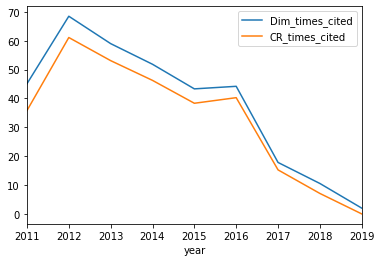

In [102]:
df_in.groupby(['year'])['Dim_times_cited','CR_times_cited'].mean().plot()

In [106]:

df_retry =df_in[df_in.CR_times_cited.isna()]
df_retry 

,FinalDOI,ID,complete,api_add,field_citation_ratio,highly_cited_1,highly_cited_10,highly_cited_5,license,recent_citations,relative_citation_ratio,Dim_times_cited,pub_date_CR_API,CR_times_cited,authors_CR,year,month
72,10.3233/jpd-120126,490,"antoniades c, xuc z, carpenter rhs, barker r. ...","{'doi': '10.3233/jpd-120126', 'times_cited': 5...",0.98,False,False,False,This data has been sourced via the Dimensions ...,3.0,0.23,5.0,NaN,NaN,NaN,NaN,NaN
935,10.3978/j.issn.2225-319X.2014.05.14,981,"howard dp, sideso e, handa a, rothwell pm. inc...","{'doi': '10.3978/j.issn.2225-319x.2014.05.14',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,10.3978/j.issn.2305-5839.2015.09.12,1723,"malavige gn, ogg gs.. role of skin homing t ce...","{'doi': '10.3978/j.issn.2305-5839.2015.09.12',...",NaN,False,False,False,This data has been sourced via the Dimensions ...,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN
1830,10.5083/ejcm.20424884.147,2198,"sahan km, channon km, choudhury rp, kharbanda ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,10.3978/j.issn.2072-1439.2016.01.54,1781,"turnbull cd, bratton dj, craig se, kohler m, s...","{'doi': '10.3978/j.issn.2072-1439.2016.01.54',...",4.79,False,False,False,This data has been sourced via the Dimensions ...,8.0,1.79,10.0,NaN,NaN,NaN,NaN,NaN


In [104]:
cr.works(ids=df_in.FinalDOI[469])['message']

#['created']['date-time']
#['is-referenced-by-count']
# ['author']

{'DOI': '10.1038/sj.bdj.2015.166',
 'ISSN': ['0007-0610', '1476-5373'],
 'URL': 'http://dx.doi.org/10.1038/sj.bdj.2015.166',
 'alternative-id': ['BFsjbdj2015166'],
 'assertion': [{'group': {'label': 'Article History',
    'name': 'ArticleHistory'},
   'label': 'First Online',
   'name': 'first_online',
   'order': 1,
   'value': '13 March 2015'}],
 'container-title': ['British Dental Journal'],
 'content-domain': {'crossmark-restriction': False,
  'domain': ['link.springer.com']},
 'created': {'date-parts': [[2015, 3, 13]],
  'date-time': '2015-03-13T06:46:14Z',
  'timestamp': 1426229174000},
 'deposited': {'date-parts': [[2019, 4, 12]],
  'date-time': '2019-04-12T17:14:20Z',
  'timestamp': 1555089260000},
 'indexed': {'date-parts': [[2019, 4, 12]],
  'date-time': '2019-04-12T17:40:29Z',
  'timestamp': 1555090829455},
 'is-referenced-by-count': 0,
 'issn-type': [{'type': 'print', 'value': '0007-0610'},
  {'type': 'electronic', 'value': '1476-5373'}],
 'issue': '5',
 'issued': {'date-pa

In [105]:
df_retry[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_retry.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

C:\Users\loz_r\Anaconda3\envs\biblio_tools\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [ ]:
df_retry

In [ ]:
df_out = df_in

In [ ]:
df_out[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_retry.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

In [ ]:
df_out.count()